In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#deepLearning Libraries
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D


In [44]:
img_dim = 256

#input layer
inputs = Input(shape=(img_dim, img_dim, 3))

#First conv block(hidden layer)
model = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
model = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = MaxPool2D(pool_size=(2, 2))(model)

#Second conv block(hidden layer)
model = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2, 2))(model)

#Third conv block(hidden layer)
model = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2, 2))(model)

#Fourth conv block(hidden layer)
model = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(model)
model = BatchNormalization()(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate= 0.2)(model)

#Fully Connected layer
model = Flatten()(model)
model = Dense(units=512, activation='relu')(model)
model = Dropout(rate=0.7)(model)
model = Dense(units=128, activation='relu')(model)
model = Dropout(rate=0.5)(model)
model = Dense(units=64, activation='relu')(model)
model = Dropout(rate=0.3)(model)

#Output layer
output = Dense(units=1, activation='sigmoid')(model)

#Creating model and compiling
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
def preprocess_image(image_path, img_dim):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_dim, img_dim))
    img = img.astype('float32') / 255
    return img

In [46]:
model.load_weights('efficient_weight.hdf5')

1/1 [==============================] - 0s 140ms/step
Confidence: 99%


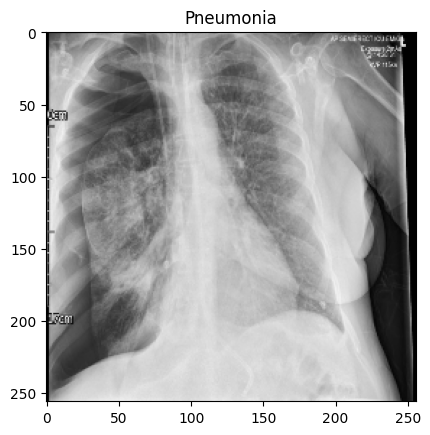

In [47]:
image_path = 'test_net/Infected/infected5.jpeg'
test_image = preprocess_image(image_path, img_dim)

prediction = model.predict(np.expand_dims(test_image, axis=0))

plt.imshow(test_image)

# Print the prediction result
if prediction[0][0] < 0.5:
    plt.title("Normal")
    print('Confidence: {}%'.format(int(prediction[0][0] * 100)))
else:
    plt.title("Pneumonia")
    print('Confidence: {}%'.format(int(prediction[0][0] * 100)))